<a href="https://colab.research.google.com/github/Shaan2522/ML-models/blob/main/sms_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path =  "/content/drive/MyDrive/Colab Notebooks/Datasets/sms_spam.csv"
#attempt to read the CSV file with different encodings
for encoding in encodings:
  try:
    df = pd.read_csv(file_path, encoding=encoding)
    print(f"File successfully read with encoding: {encoding}")
    break #Mop the Loop if successful
  except UnicodeDecodeError:
    print(f"Failed to read with encoding {encoding}")
    continue #Try the next encing
  #
  # if the Loop completes without success, of will not be defined
if 'df' in locals():
  print("CSV file has been successfully loaded.")
else:
  print("All encoding attempts failed, Unable to read the CSV file.")

Failed to read with encoding utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# **1. Data Cleaning**

In [ ]:
# in unnamed 2,3,4 column almost all values are missing reove those three column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# let's rename the column name for better understanding
df = df.rename(columns={'v1':'target','v2':'text'})
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [ ]:
# label should be in numeric format so let me apply labelencoder to convert it in numeric
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print(df.shape)
print(df.isnull().sum())
print(df.duplicated().sum())

(5572, 2)
target    0
text      0
dtype: int64
403


In [ ]:
# in this dataset don't have any missing value but 403 rows are duplicate so, first remove those rows
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

**EDA**

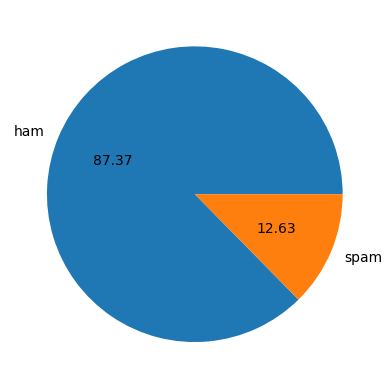

In [ ]:
# pie plot of ham and spam msgs
plt.pie(df['target'].value_counts(),labels=('ham','spam'),autopct='%0.2f')
plt.show()

Above pie chart shows big chunk of ham and very less spam data. So it is not balanced

In [ ]:
# let's calculate number of chercters present in per rows..
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk

# now lets calculat number of words present in per words....
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# now lets calculate the number of sentence per rows...
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))  # number of sentence per rows
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[df['target']==0][['num_characters','num_words','num_sentences']]

,num_characters,num_words,num_sentences
0,111,24,2
1,29,8,2
3,49,13,1
4,61,15,1
6,77,18,2
...,...,...,...
5565,12,4,1
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [ ]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==1][['num_characters','num_words','num_sentences']]

,num_characters,num_words,num_sentences
2,155,37,2
5,148,39,4
8,158,32,5
9,154,31,3
11,136,31,3
...,...,...,...
5537,90,18,3
5540,160,38,6
5547,160,35,5
5566,147,30,1


In [ ]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

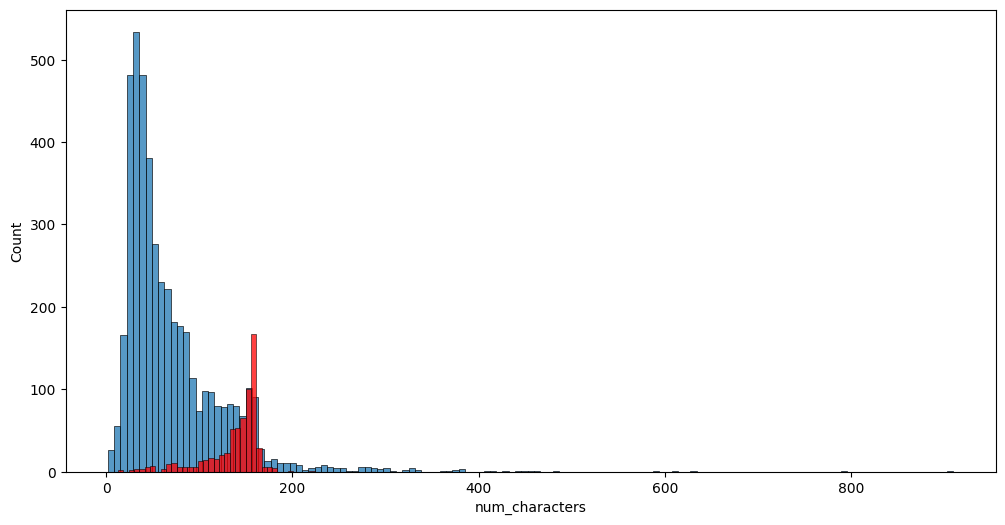

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

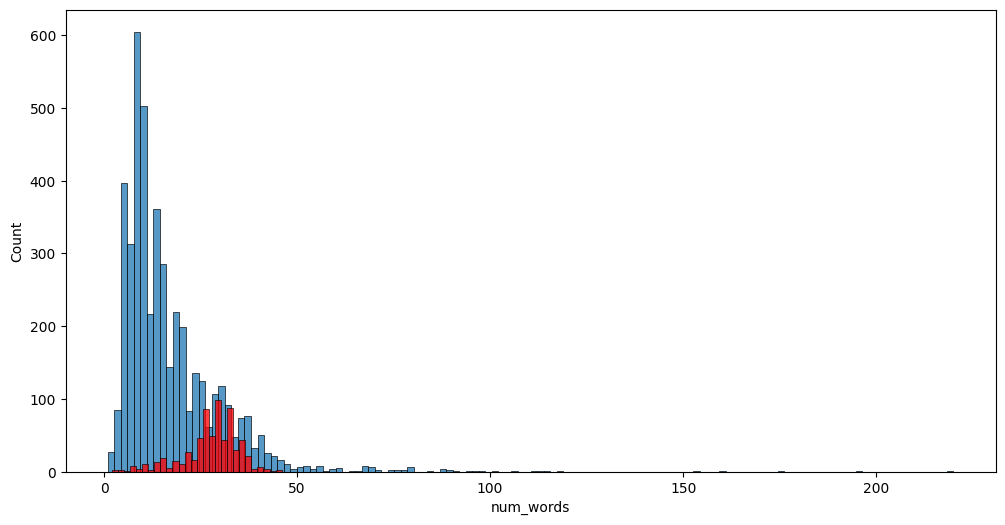

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

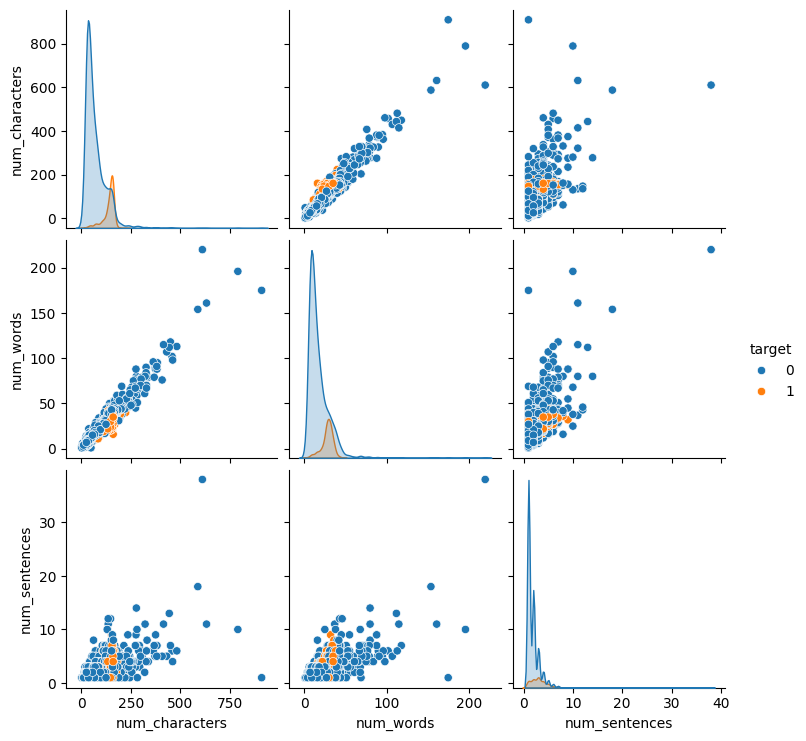

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
# lets check the correlation
df.corr()

<ipython-input-25-47329bc8f508>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-26-081b70636029>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

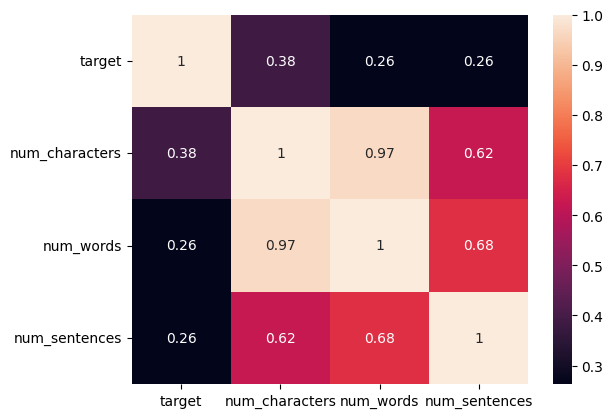

In [ ]:
# plot correlation
sns.heatmap(df.corr(),annot=True)

# **2. Data Pre-processing**

- Lower case
- Tokenization
- Removing special characters
- Removing stopwords and puctuation
- Stemming

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
# let's define a function that will be do all the above operation at a time
def text_transform(text):
    text = text.lower()  # lower case of all letters
    text = nltk.word_tokenize(text)   # separate the words

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:   # stopwords and punctuation remove
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))    # stem the all words

    return " ".join(y)   # at last join all words in a string

In [ ]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [ ]:
text_transform(df['text'][133])  # test the function

'sunshin quiz wkli q win top soni dvd player u know countri algarv txt ansr sp tyron'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print(ps.stem('loving'))
print(ps.stem('walking'))

love
walk


In [ ]:
import string
string.punctuation   # punctuation list

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english') # stopwords list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df['transformed_text'] = df['text'].apply(text_transform)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


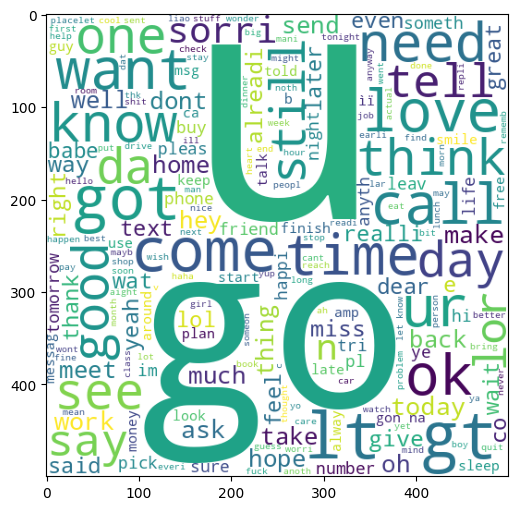

In [ ]:
# ham msgs most frequent words
from wordcloud import WordCloud
plt.figure(figsize=(8,6))
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

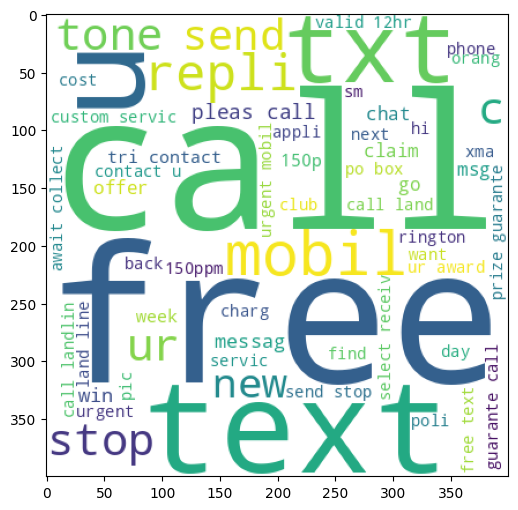

In [ ]:
# spam msgs most frequent words
plt.figure(figsize=(8,6))
wc = WordCloud(width=400, height=400, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
# most common 20 words in spam msgs
from collections import Counter
Counter(spam_corpus).most_common(20)
common_words_in_spam_msg = pd.DataFrame(Counter(spam_corpus).most_common(20))
common_words_in_spam_msg = common_words_in_spam_msg.rename(columns={0:'Words',1:'Counts'})
common_words_in_spam_msg

,Words,Counts
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


<ipython-input-41-2917ea54545d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = common_words_in_spam_msg['Words'],y = common_words_in_spam_msg['Counts'], palette='cool')


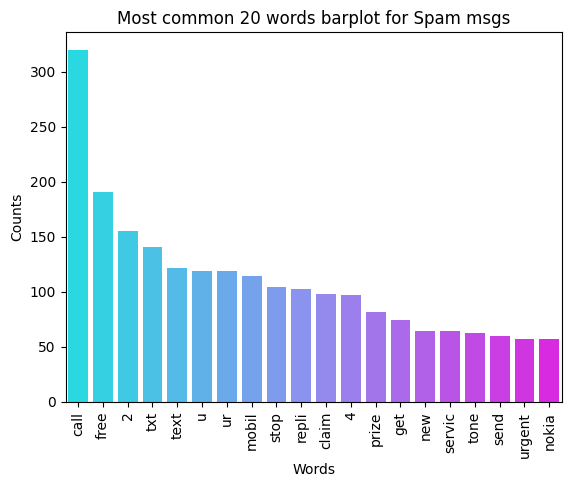

In [ ]:
# barplot of frequent words
sns.barplot(x = common_words_in_spam_msg['Words'],y = common_words_in_spam_msg['Counts'], palette='cool')
plt.xticks(rotation=90)
plt.title('Most common 20 words barplot for Spam msgs')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
len(ham_corpus)

35404

In [ ]:
from collections import Counter
Counter(ham_corpus).most_common(30)
# create a dataframe of ham_corpus
common_words_in_ham_msgs = pd.DataFrame(Counter(ham_corpus).most_common(30))
common_words_in_ham_msgs = common_words_in_ham_msgs.rename(columns={0:'Words',1:'Counts'})
common_words_in_ham_msgs

,Words,Counts
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


<ipython-input-44-aec0a1f519c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = common_words_in_ham_msgs['Words'], y = common_words_in_ham_msgs['Counts'], palette='cool')


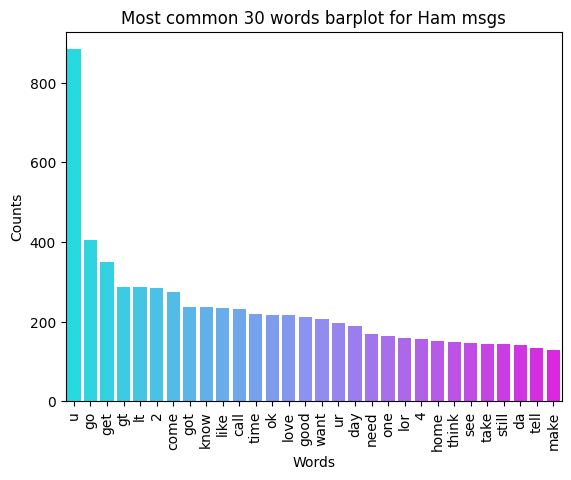

In [ ]:
# plot this most common words in bar plot
sns.barplot(x = common_words_in_ham_msgs['Words'], y = common_words_in_ham_msgs['Counts'], palette='cool')
plt.xticks(rotation=90)
plt.title('Most common 30 words barplot for Ham msgs')
plt.show()

# **3. Model Building**

In [ ]:
# text vectorization using BoW technique
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values
y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (4135, 3000)
Shape of X_test (1034, 3000)
Shape of y_train (4135,)
Shape of y_test (1034,)


In [ ]:
from sklearn.naive_bayes import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy score of the GaussianNB algorithm is ',accuracy_score(y_test,y_pred1))
print('Confusion matrix of the GaussianNB algorithm is ',confusion_matrix(y_test,y_pred1))
print('Precision score of the GaussianNB algorithm is ',precision_score(y_test,y_pred1))

Accuracy score of the GaussianNB algorithm is  0.8607350096711799
Confusion matrix of the GaussianNB algorithm is  [[769 120]
 [ 24 121]]
Precision score of the GaussianNB algorithm is  0.5020746887966805


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy score of the MultinomialNB algorithm is ',accuracy_score(y_test,y_pred2))
print('Confusion matrix of the MultinomialNB algorithm is ',confusion_matrix(y_test,y_pred2))
print('Precision score of the MultinomialNB algorithm is ',precision_score(y_test,y_pred2))

Accuracy score of the MultinomialNB algorithm is  0.9729206963249516
Confusion matrix of the MultinomialNB algorithm is  [[888   1]
 [ 27 118]]
Precision score of the MultinomialNB algorithm is  0.9915966386554622


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy score of the BernoulliNB algorithm is ',accuracy_score(y_test,y_pred3))
print('Confusion matrix of the BernoulliNB algorithm is ',confusion_matrix(y_test,y_pred3))
print('Precision score of the BernoulliNB algorithm is ',precision_score(y_test,y_pred3))

Accuracy score of the BernoulliNB algorithm is  0.9729206963249516
Confusion matrix of the BernoulliNB algorithm is  [[884   5]
 [ 23 122]]
Precision score of the BernoulliNB algorithm is  0.9606299212598425


In [ ]:
# Let's explore more algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
lrc = LogisticRegression()
svc = SVC()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgc = XGBClassifier()

In [ ]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbc,
    'xgb' : xgc
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(etc, X_train,y_train,X_test,y_test)

(0.9787234042553191, 0.984251968503937)

In [ ]:
etc.fit(X_train,y_train)
y_predicted  = etc.predict(X_test)
print('Accuracy - ',accuracy_score(y_test,y_predicted))
print('Confusion matrix - ',confusion_matrix(y_test,y_predicted))
print('Precision_score - ',precision_score(y_test,y_predicted))

Accuracy -  0.9787234042553191
Confusion matrix -  [[887   2]
 [ 20 125]]
Precision_score -  0.984251968503937


In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9584139264990329
Precision -  0.9473684210526315
For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9917355371900827
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9487427466150871
Precision -  0.823943661971831
For  KN
Accuracy -  0.9168278529980658
Precision -  1.0
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9917355371900827
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8814814814814815
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.9769230769230769
For  GBDT
Accuracy -  0.960348162475822
Precision -  0.9727272727272728
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9312977099236641


In [ ]:
# accuracy and precision score with max_features
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
4,KN,0.916828,1.000000
1,SVC,0.974855,0.991736
5,RF,0.974855,0.991736
2,NB,0.972921,0.991597
8,ETC,0.979691,0.976923
9,GBDT,0.960348,0.972727
0,LR,0.958414,0.947368
10,xgb,0.969052,0.931298
7,BgC,0.959381,0.881481
6,AdaBoost,0.950677,0.867188


# **Model Improve**

In [ ]:
# 1. change the max_features parameters to 1000 of Tfidf
test_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_1000':accuracy_scores,
                        'Precision_max_ft_1000':precision_scores}).sort_values('Precision_max_ft_1000',ascending=False)
test_df1 = performance_df.merge(test_df1,on='Algorithm')
test_df1

,Algorithm,Accuracy,Precision,Accuracy_max_ft_1000,Precision_max_ft_1000
0,KN,0.916828,1.000000,0.916828,1.000000
1,SVC,0.974855,0.991736,0.974855,0.991736
2,RF,0.974855,0.991736,0.974855,0.991736
3,NB,0.972921,0.991597,0.972921,0.991597
4,ETC,0.979691,0.976923,0.979691,0.976923
5,GBDT,0.960348,0.972727,0.960348,0.972727
6,LR,0.958414,0.947368,0.958414,0.947368
7,xgb,0.969052,0.931298,0.969052,0.931298
8,BgC,0.959381,0.881481,0.959381,0.881481
9,AdaBoost,0.950677,0.867188,0.950677,0.867188


In [ ]:
# change the max_features parameters to 2000 of Tfidf
test_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_2000':accuracy_scores,
                        'Precision_max_ft_2000':precision_scores}).sort_values('Precision_max_ft_2000',ascending=False)
test_df2 = test_df1.merge(test_df2,on='Algorithm')
test_df2

,Algorithm,Accuracy,Precision,Accuracy_max_ft_1000,Precision_max_ft_1000,Accuracy_max_ft_2000,Precision_max_ft_2000
0,KN,0.916828,1.000000,0.916828,1.000000,0.916828,1.000000
1,SVC,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736
2,RF,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736
3,NB,0.972921,0.991597,0.972921,0.991597,0.972921,0.991597
4,ETC,0.979691,0.976923,0.979691,0.976923,0.979691,0.976923
5,GBDT,0.960348,0.972727,0.960348,0.972727,0.960348,0.972727
6,LR,0.958414,0.947368,0.958414,0.947368,0.958414,0.947368
7,xgb,0.969052,0.931298,0.969052,0.931298,0.969052,0.931298
8,BgC,0.959381,0.881481,0.959381,0.881481,0.959381,0.881481
9,AdaBoost,0.950677,0.867188,0.950677,0.867188,0.950677,0.867188


In [ ]:
# change the max_features parameters to 2000 of Tfidf
test_df3 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,
                        'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
test_df3 = test_df2.merge(test_df3,on='Algorithm')
test_df3

,Algorithm,Accuracy,Precision,Accuracy_max_ft_1000,Precision_max_ft_1000,Accuracy_max_ft_2000,Precision_max_ft_2000,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.916828,1.000000,0.916828,1.000000,0.916828,1.000000,0.916828,1.000000
1,SVC,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736
2,RF,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736
3,NB,0.972921,0.991597,0.972921,0.991597,0.972921,0.991597,0.972921,0.991597
4,ETC,0.979691,0.976923,0.979691,0.976923,0.979691,0.976923,0.979691,0.976923
5,GBDT,0.960348,0.972727,0.960348,0.972727,0.960348,0.972727,0.960348,0.972727
6,LR,0.958414,0.947368,0.958414,0.947368,0.958414,0.947368,0.958414,0.947368
7,xgb,0.969052,0.931298,0.969052,0.931298,0.969052,0.931298,0.969052,0.931298
8,BgC,0.959381,0.881481,0.959381,0.881481,0.959381,0.881481,0.959381,0.881481
9,AdaBoost,0.950677,0.867188,0.950677,0.867188,0.950677,0.867188,0.950677,0.867188


In [ ]:
# after apply minmaxscaler function
test_df4 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_Scaling':accuracy_scores,
                        'Precision_Scaling':precision_scores}).sort_values('Precision_Scaling',ascending=False)
test_df4 = test_df3.merge(test_df4,on='Algorithm')
test_df4

,Algorithm,Accuracy,Precision,Accuracy_max_ft_1000,Precision_max_ft_1000,Accuracy_max_ft_2000,Precision_max_ft_2000,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_Scaling,Precision_Scaling
0,KN,0.916828,1.000000,0.916828,1.000000,0.916828,1.000000,0.916828,1.000000,0.916828,1.000000
1,SVC,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736
2,RF,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736,0.974855,0.991736
3,NB,0.972921,0.991597,0.972921,0.991597,0.972921,0.991597,0.972921,0.991597,0.972921,0.991597
4,ETC,0.979691,0.976923,0.979691,0.976923,0.979691,0.976923,0.979691,0.976923,0.979691,0.976923
5,GBDT,0.960348,0.972727,0.960348,0.972727,0.960348,0.972727,0.960348,0.972727,0.960348,0.972727
6,LR,0.958414,0.947368,0.958414,0.947368,0.958414,0.947368,0.958414,0.947368,0.958414,0.947368
7,xgb,0.969052,0.931298,0.969052,0.931298,0.969052,0.931298,0.969052,0.931298,0.969052,0.931298
8,BgC,0.959381,0.881481,0.959381,0.881481,0.959381,0.881481,0.959381,0.881481,0.959381,0.881481
9,AdaBoost,0.950677,0.867188,0.950677,0.867188,0.950677,0.867188,0.950677,0.867188,0.950677,0.867188
